In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [2]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


[Text(-1.0, 0, ''),
 Text(-0.8, 0, ''),
 Text(-0.6, 0, ''),
 Text(-0.3999999999999999, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.20000000000000018, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

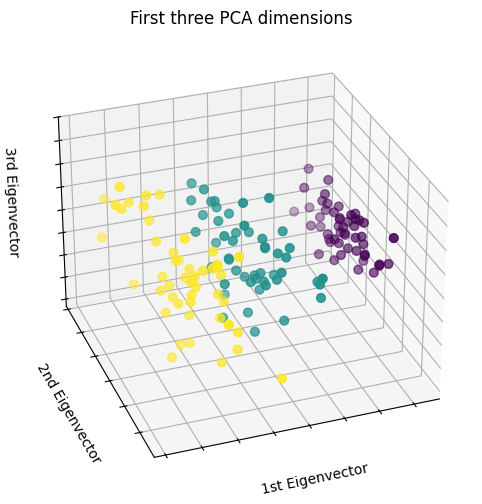

In [3]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])


In [4]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
df['PCA1'], df['PCA2'] = pca.fit_transform(df).T

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PCA1,PCA2
0,5.1,3.5,1.4,0.2,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,-2.728717,0.326755
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944110,0.187532
146,6.3,2.5,5.0,1.9,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,1.764346,0.078859
148,6.2,3.4,5.4,2.3,1.900942,0.116628


In [6]:
# Apply KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['PCA1', 'PCA2']])

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,1.527167,-0.375317,0
147,6.5,3.0,5.2,2.0,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,1.900942,0.116628,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

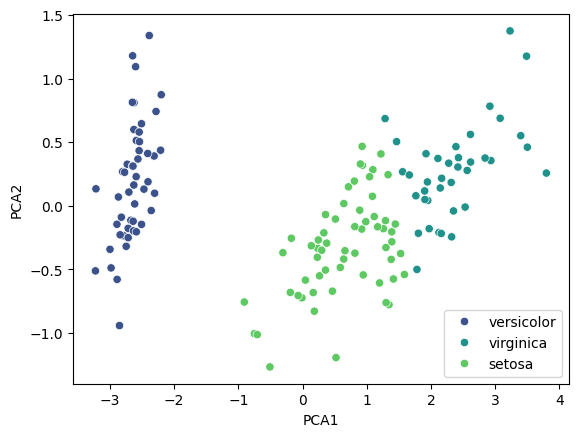

In [10]:
# Use seaborn with the known labels for the data
import seaborn as sns
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue=iris.target_names[df['cluster']], palette='viridis')


In [12]:
# Print the count of each species in each cluster
for cluster_id in range(3):
    print(f'Cluster {cluster_id}:')
    print(df[df['cluster'] == cluster_id]['species'].value_counts())


Cluster 0:
species
versicolor    47
virginica     14
Name: count, dtype: int64
Cluster 1:
species
setosa    50
Name: count, dtype: int64
Cluster 2:
species
virginica     36
versicolor     3
Name: count, dtype: int64


In [13]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'PCA1', 'PCA2', 'cluster', 'species'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import numpy as np




## Describe the data treating the labels as unknown and apply unsupervised methods for it

([0, 1, 2, 3],
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

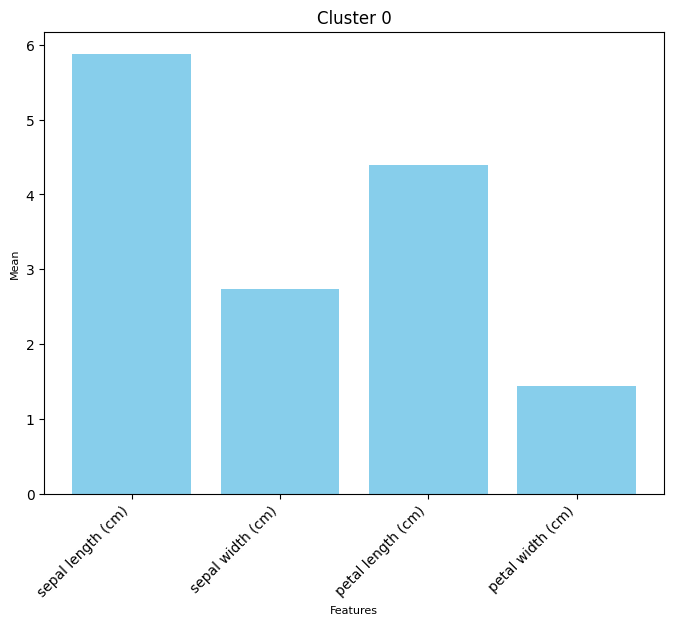

In [29]:

df0 = df.loc[df['cluster'] == 0 ]
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
mean = df0[columns].mean()
plt.figure(figsize=(8, 6))  
plt.bar(mean.index, mean.values, color='skyblue')

plt.xlabel('Features', fontsize=8)
plt.ylabel('Mean', fontsize=8)
plt.title('Cluster 0', fontsize=12)
plt.xticks(rotation=45, ha='right')  



## Cluster 0 interpretation
Cluster 0 is characterized by long, wide sepals and short, narrow petals. 

([0, 1, 2, 3],
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

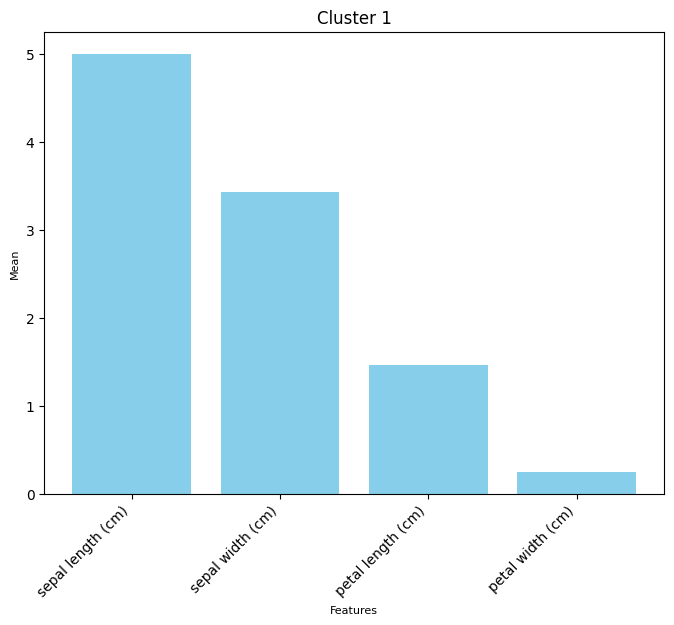

In [30]:
df1 = df.loc[df['cluster'] == 1 ]
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
mean = df1[columns].mean()
plt.figure(figsize=(8, 6)) 
plt.bar(mean.index, mean.values, color='skyblue')

plt.xlabel('Features', fontsize=8)
plt.ylabel('Mean', fontsize=8)
plt.title('Cluster 1', fontsize=12)
plt.xticks(rotation=45, ha='right') 

The flowers of cluster 1 are characterized by sepals of great length and medium width, with smaller and less wide petals.

([0, 1, 2, 3],
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

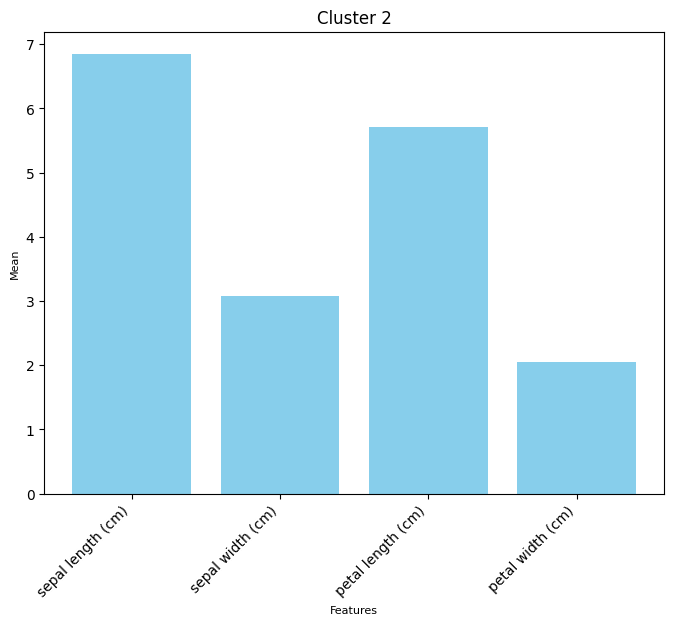

In [31]:
df2 = df.loc[df['cluster'] == 2 ]
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
mean = df2[columns].mean()
plt.figure(figsize=(8, 6))  
plt.bar(mean.index, mean.values, color='skyblue')

plt.xlabel('Features', fontsize=8)
plt.ylabel('Mean', fontsize=8)
plt.title('Cluster 2', fontsize=12)
plt.xticks(rotation=45, ha='right')  

The flowers in cluster 2 are characterized by very long sepals, with medium width and long petals with little width.